In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LearningCurveDisplay


In [2]:

# 예시 데이터 생성
X, y = make_classification(n_samples=100, n_features=20, random_state=42)

# 모델 정의
estimator = LogisticRegression(solver='liblinear', random_state=42)


In [3]:

# 학습 곡선 계산
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

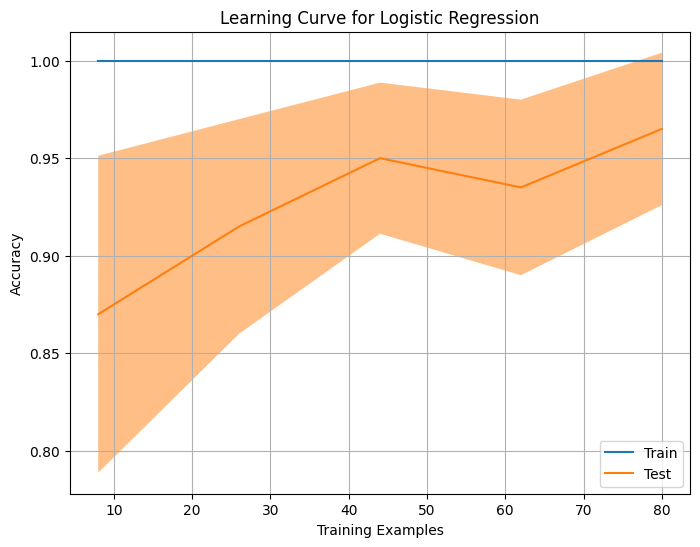

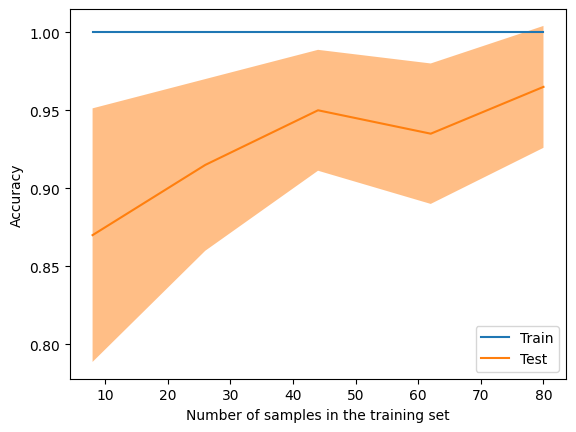

In [5]:
# LearningCurveDisplay 객체 생성 및 시각화
common_params = {"X": X, "y": y, "estimator": estimator, "cv": cv, "score_name": "Accuracy"}

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

LearningCurveDisplay.from_estimator(**common_params).plot(ax=axes)
axes.set_title("Learning Curve for Logistic Regression")
axes.set_xlabel("Training Examples")
axes.set_ylabel("Accuracy")
axes.grid()
# plt.show()

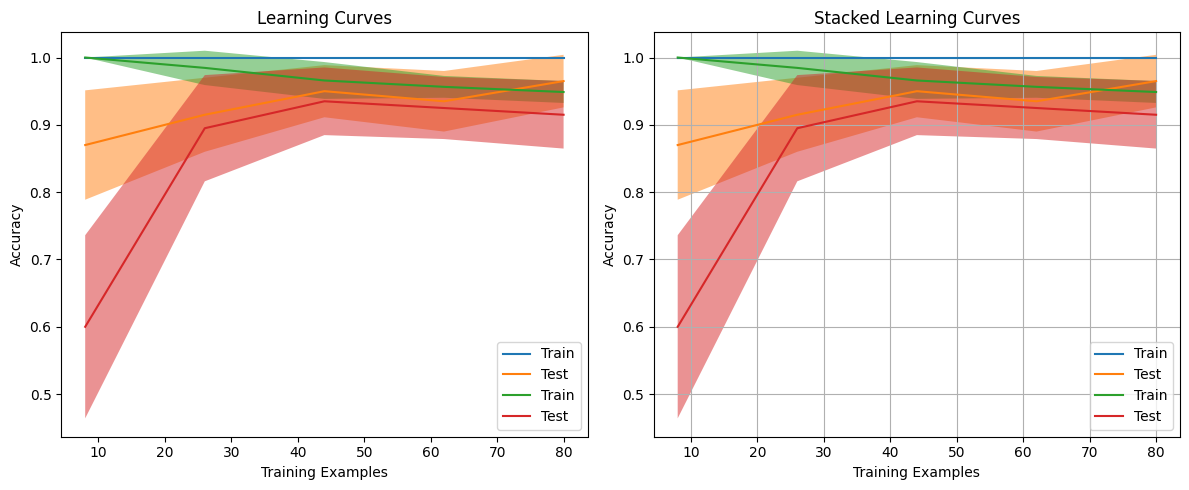

In [10]:

# 여러 개의 학습 곡선 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

estimators = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Naive Bayes": GaussianNB(),
}

for name, estimator in estimators.items():
    LearningCurveDisplay.from_estimator(estimator, X, y, cv=cv, score_name="Accuracy", ax=axes[0])
    axes[0].set_title("Learning Curves")
    axes[0].set_xlabel("Training Examples")
    axes[0].set_ylabel("Accuracy")
    axes[0].grid()

LearningCurveDisplay.from_estimator(
    estimators["Logistic Regression"], X, y, cv=cv, score_name="Accuracy", ax=axes[1]
)
LearningCurveDisplay.from_estimator(
    estimators["Naive Bayes"], X, y, cv=cv, score_name="Accuracy", ax=axes[1]
)
axes[1].set_title("Stacked Learning Curves")
axes[1].set_xlabel("Training Examples")
axes[1].set_ylabel("Accuracy")
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>